<a href="https://colab.research.google.com/github/Mayur-nimkande-20/Comparative-Stock-Price-detection-using-ml/blob/main/Stock_Price_Prediction_using_Time_Series_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Date        Open        High         Low       Close   Adj Close  \
0  2018-11-19  293.500000  293.500000  286.049988  288.149994  275.767822   
1  2018-11-20  285.899994  288.549988  282.500000  283.450012  271.269775   
2  2018-11-21  283.450012  289.549988  283.049988  287.049988  274.715088   
3  2018-11-22  285.950012  287.049988  281.600006  282.700012  270.552032   
4  2018-11-26  284.100006  287.250000  279.600006  286.399994  274.093018   

     Volume  
0  13799970  
1  12900924  
2  16167419  
3  12066797  
4  16846820  
              Open         High          Low        Close    Adj Close  \
count  1236.000000  1236.000000  1236.000000  1236.000000  1236.000000   
mean    401.430785   406.090737   396.058818   400.984749   389.594417   
std     135.841885   136.314995   135.165347   135.739997   136.494136   
min     151.949997   153.199997   149.449997   150.850006   144.367783   
25%     289.299988   292.724991   284.224998   288.124992   275.743896   
50%     4

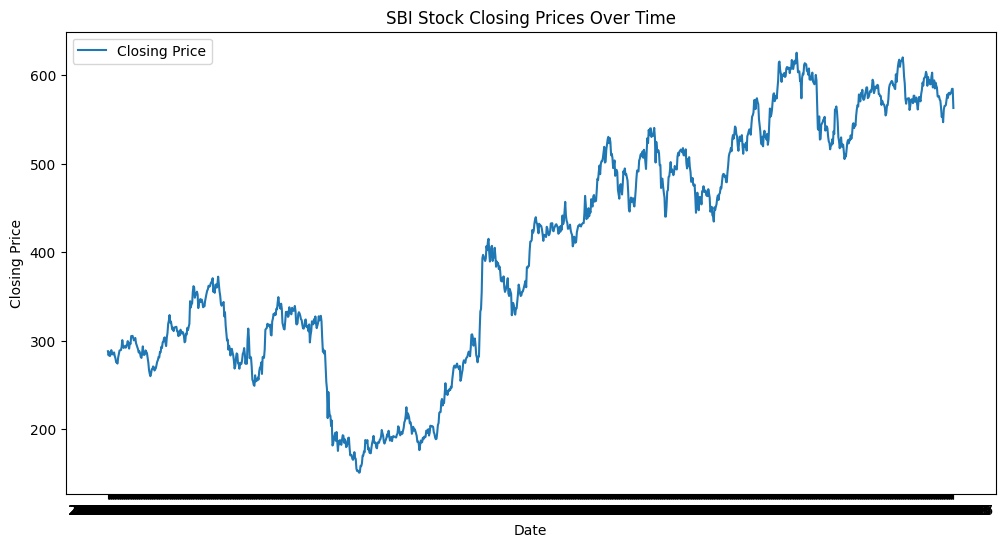

<ipython-input-21-566c4e2ee91a>:32: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



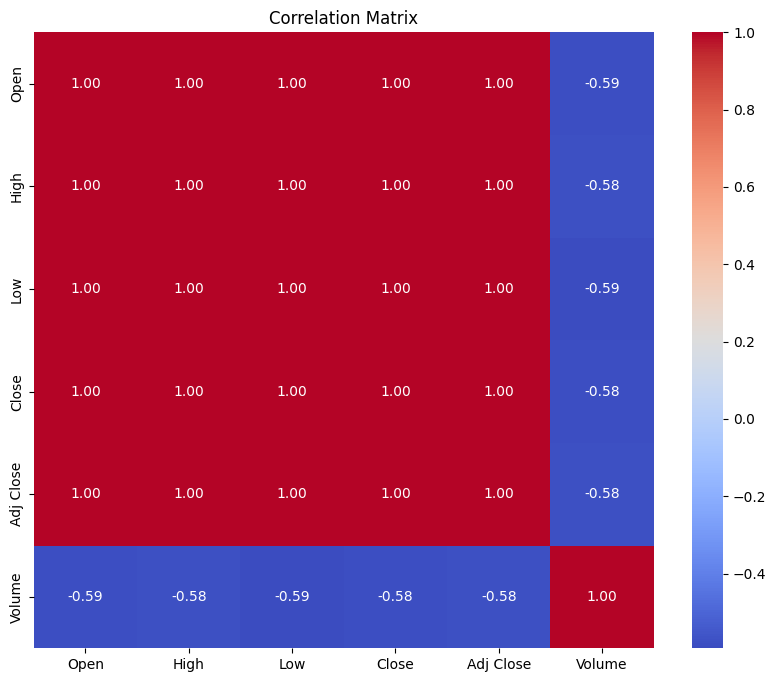

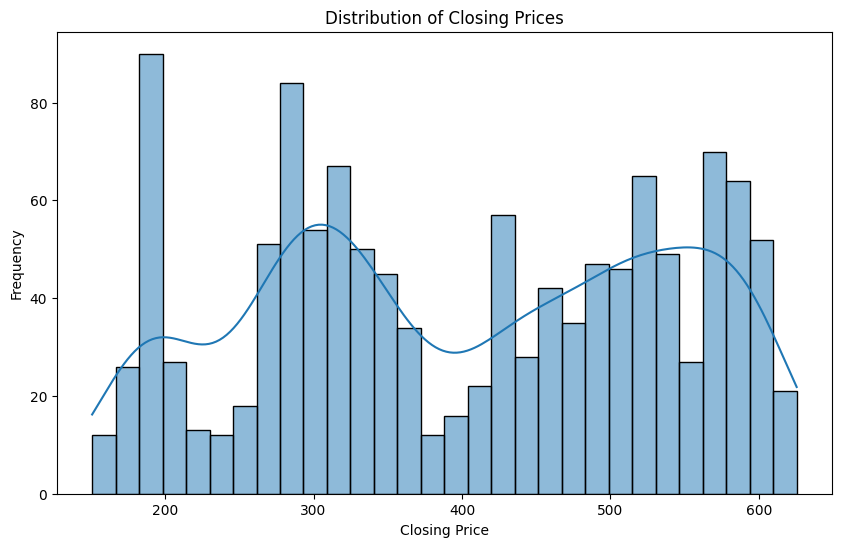

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np

# Load the dataset
file_path = "/content/drive/MyDrive/dsml dataset/SBIN.NS (1).csv"
sbi_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(sbi_data.head())

# Summary statistics of numerical columns
print(sbi_data.describe())

# Check for missing values
print(sbi_data.isnull().sum())

# Visualize stock closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(sbi_data['Date'], sbi_data['Close'], label='Closing Price')
plt.title('SBI Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = sbi_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Distribution of closing prices
plt.figure(figsize=(10, 6))
sns.histplot(sbi_data['Close'], bins=30, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()


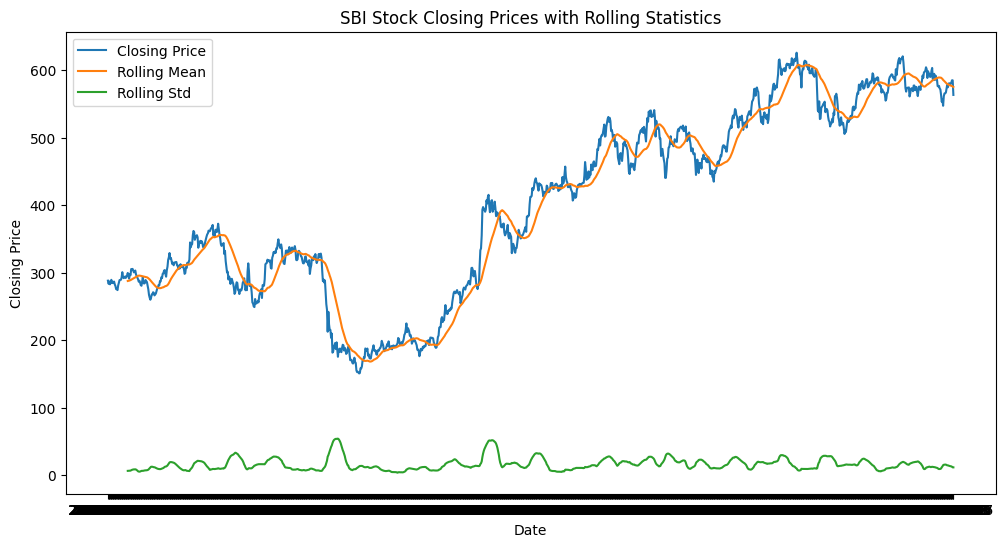

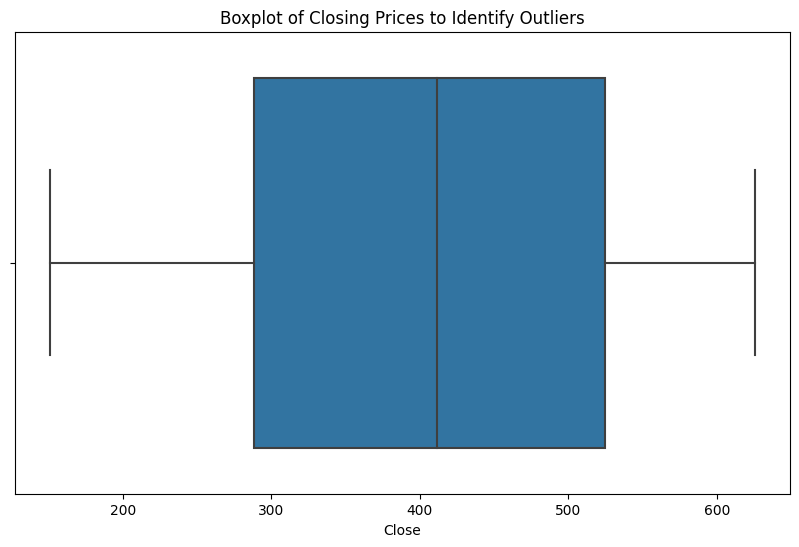

<Figure size 1200x800 with 0 Axes>

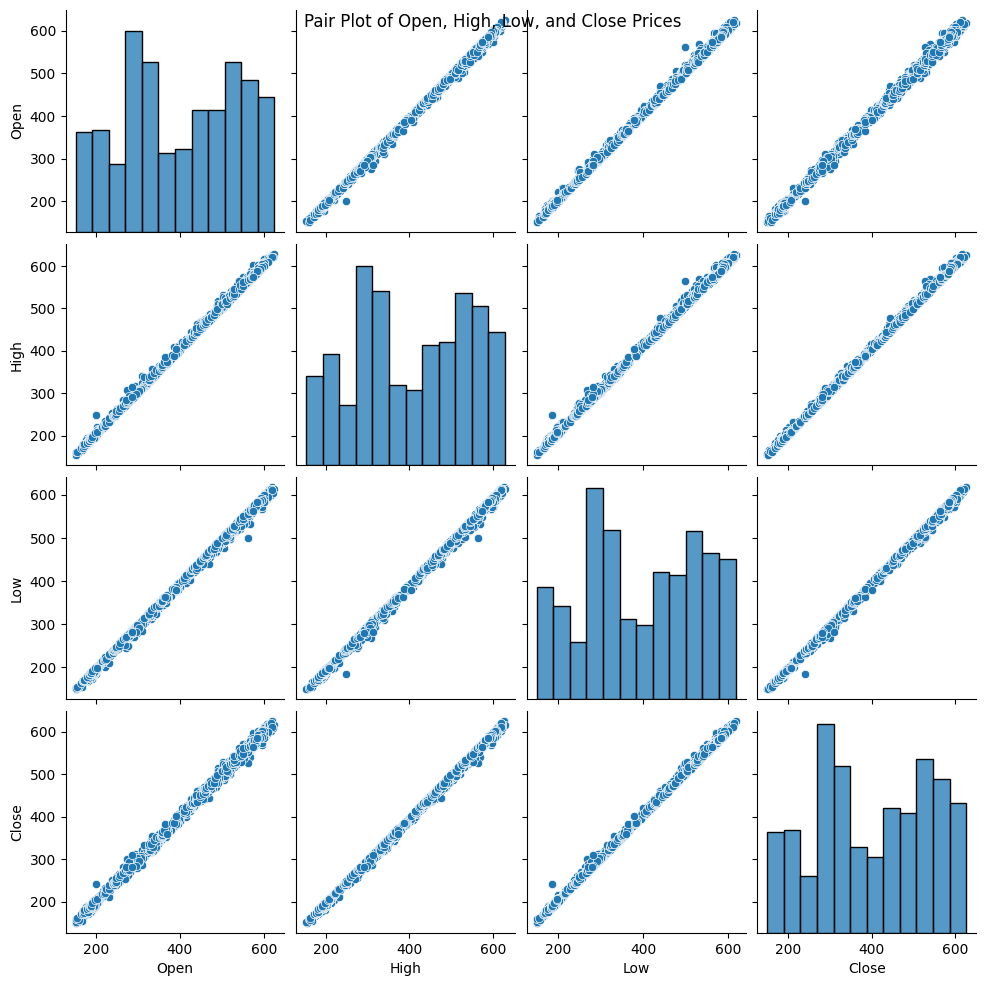

Correlation between Close Price and Volume: -0.5832736213920088, p-value: 1.457950230474136e-113


In [ ]:
# Time Series Analysis: Visualize rolling statistics
plt.figure(figsize=(12, 6))
sbi_data['Rolling Mean'] = sbi_data['Close'].rolling(window=30).mean()
sbi_data['Rolling Std'] = sbi_data['Close'].rolling(window=30).std()

plt.plot(sbi_data['Date'], sbi_data['Close'], label='Closing Price')
plt.plot(sbi_data['Date'], sbi_data['Rolling Mean'], label='Rolling Mean')
plt.plot(sbi_data['Date'], sbi_data['Rolling Std'], label='Rolling Std')
plt.title('SBI Stock Closing Prices with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Outlier Detection: Visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=sbi_data['Close'])
plt.title('Boxplot of Closing Prices to Identify Outliers')
plt.show()

# Feature Distribution: Visualize distribution of features
plt.figure(figsize=(12, 8))
sns.pairplot(sbi_data[['Open', 'High', 'Low', 'Close']])
plt.suptitle('Pair Plot of Open, High, Low, and Close Prices')
plt.show()

# # Categorical Variable Analysis: Visualize counts of categorical variables
# plt.figure(figsize=(10, 6))
# sns.countplot(x='DayOfWeek', data=sbi_data)
# plt.title('Count of Data Points for Each Day of the Week')
# plt.show()

# Data Transformation: Log transformation
sbi_data['Log_Close'] = sbi_data['Close'].apply(lambda x: 0 if x == 0 else np.log(x + 1))

# Statistical Tests: Example of correlation test
correlation, p_value = scipy.stats.pearsonr(sbi_data['Close'], sbi_data['Volume'])
print(f'Correlation between Close Price and Volume: {correlation}, p-value: {p_value}')

# Interactive Visualizations: Using Plotly (install using: pip install plotly)
import plotly.express as px
fig = px.line(sbi_data, x='Date', y='Close', title='Interactive Time Series Plot')
fig.show()

Mean Absolute Error (MAE): 56.216593392729344
Mean Squared Error (MSE): 5289.078476191373
          Date  Predicted_Close
0   2023-11-18       599.687439
1   2023-11-19       599.904978
2   2023-11-20       600.122516
3   2023-11-21       600.340055
4   2023-11-22       600.557593
5   2023-11-23       600.775132
6   2023-11-24       600.992670
7   2023-11-25       601.210209
8   2023-11-26       601.427747
9   2023-11-27       601.645286
10  2023-11-28       601.862824
11  2023-11-29       602.080363
12  2023-11-30       602.297901
13  2023-12-01       602.515440
14  2023-12-02       602.732978
15  2023-12-03       602.950517
16  2023-12-04       603.168056


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



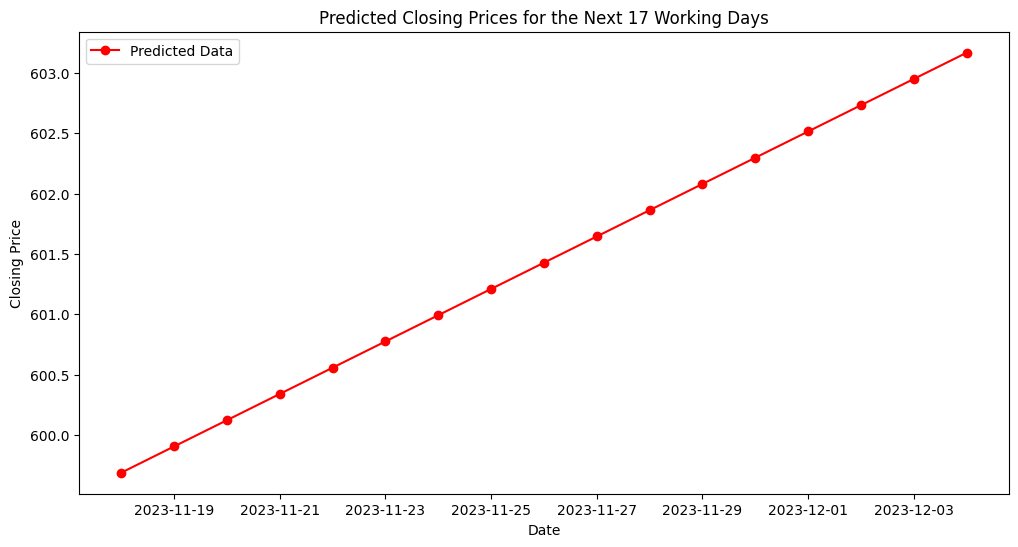

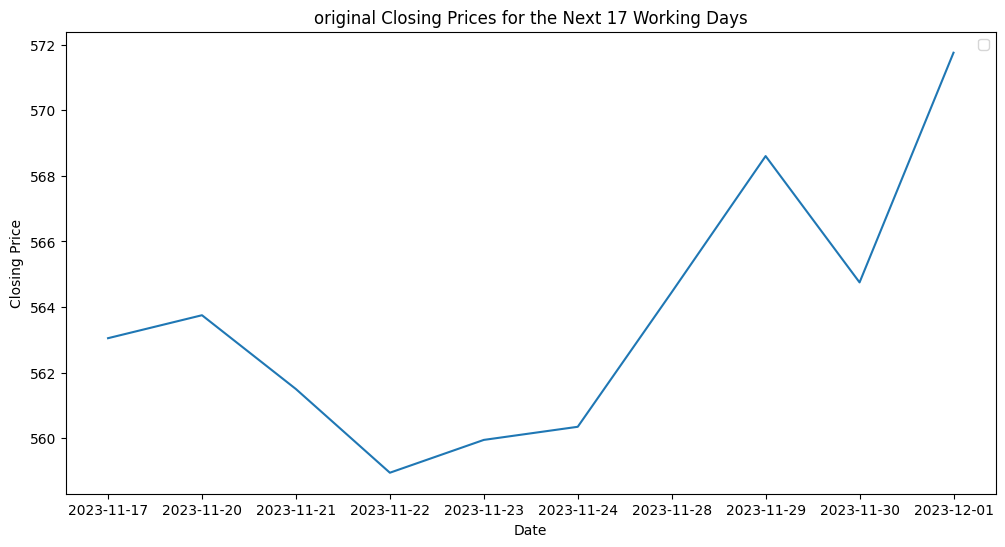

R-squared (R2) Score: 0.7200


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta


# Prepare the data
sbi_data['Date'] = pd.to_datetime(sbi_data['Date'])
sbi_data['DaysSinceStart'] = (sbi_data['Date'] - sbi_data['Date'].min()).dt.days

# Features (X) and target variable (y)
X = sbi_data[['DaysSinceStart']]
y = sbi_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate MAE and MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display MAE and MSE
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')


# Predict the next 17 working days
last_date = sbi_data['Date'].max()
next_dates = [last_date + timedelta(days=i) for i in range(1, 18)]
next_days_since_start = np.array([(date - sbi_data['Date'].min()).days for date in next_dates]).reshape(-1, 1)
predictions = model.predict(next_days_since_start)

# Display the predictions
next_dates_str = [date.strftime('%Y-%m-%d') for date in next_dates]
predictions_df = pd.DataFrame({'Date': next_dates_str, 'Predicted_Close': predictions})
print(predictions_df)


# Display the predicted data
plt.figure(figsize=(12, 6))
plt.plot(next_dates, predictions, marker='o', linestyle='-', color='red', label='Predicted Data')
plt.title('Predicted Closing Prices for the Next 17 Working Days')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

sbi_data_lat = pd.read_csv("/content/drive/MyDrive/dsml dataset/SBIN.NS (4).csv")
plt.figure(figsize=(12,6))
plt.plot(sbi_data_lat['Date'],sbi_data_lat['Close'])
plt.title('original Closing Prices for the Next 17 Working Days')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

# Display R2 score
print(f'R-squared (R2) Score: {r2:.4f}')


Epoch 1/50
31/31 [==============================] - 3s 16ms/step - loss: 0.1011
Epoch 2/50
31/31 [==============================] - 1s 18ms/step - loss: 0.0057
Epoch 3/50
31/31 [==============================] - 1s 19ms/step - loss: 0.0019
Epoch 4/50
31/31 [==============================] - 1s 19ms/step - loss: 0.0013
Epoch 5/50
31/31 [==============================] - 1s 18ms/step - loss: 0.0012
Epoch 6/50
31/31 [==============================] - 1s 21ms/step - loss: 0.0011
Epoch 7/50
31/31 [==============================] - 1s 17ms/step - loss: 0.0011
Epoch 8/50
31/31 [==============================] - 1s 20ms/step - loss: 0.0010
Epoch 9/50
31/31 [==============================] - 1s 17ms/step - loss: 0.0010
Epoch 10/50
31/31 [==============================] - 1s 18ms/step - loss: 9.8402e-04
Epoch 11/50
31/31 [==============================] - 1s 23ms/step - loss: 9.5842e-04
Epoch 12/50
31/31 [==============================] - 0s 12ms/step - loss: 9.5645e-04
Epoch 13/50
31/31 [======

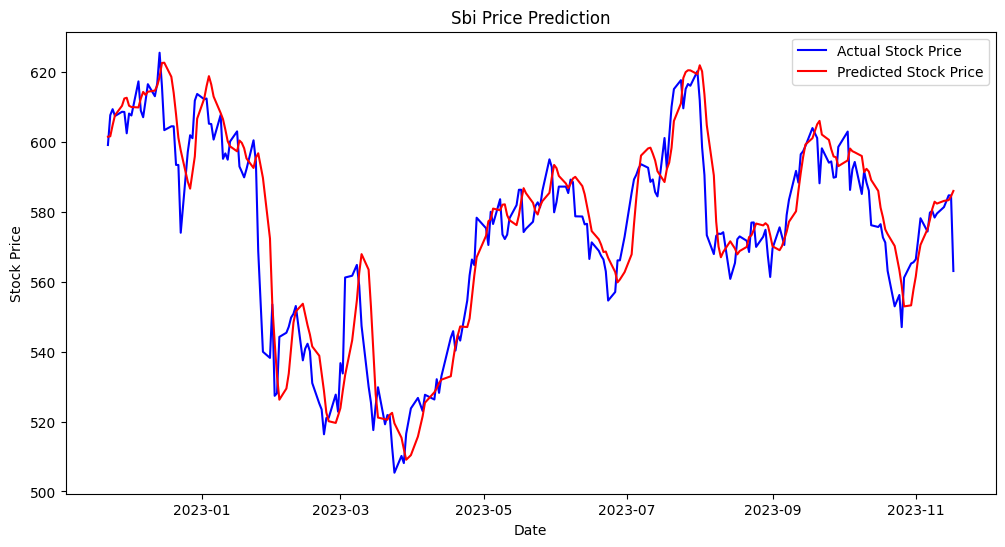

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/dsml dataset/SBIN.NS (1).csv')

# Convert 'Close' column to numeric, handling commas
# data['Close'] = pd.to_numeric(data['Close'].str.replace(',', ''), errors='coerce')

# Drop rows with NaN values (if any)
data = data.dropna()

data = data[['Date', 'Close']]
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.sort_index()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Close']])

# Create sequences for training
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        label = data[i+sequence_length, 0]  # Access the value directly from the NumPy array
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

sequence_length = 10
X, y = create_sequences(data_scaled, sequence_length)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape the data for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Stock Price', color='blue')
plt.plot(data.index[-len(predictions):], predictions, label='Predicted Stock Price', color='red')
plt.title('Sbi Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



<ipython-input-23-dd6ca8ec3cca>:15: FutureWarning:

pad is deprecated and will be removed in a future version. Use ffill instead.



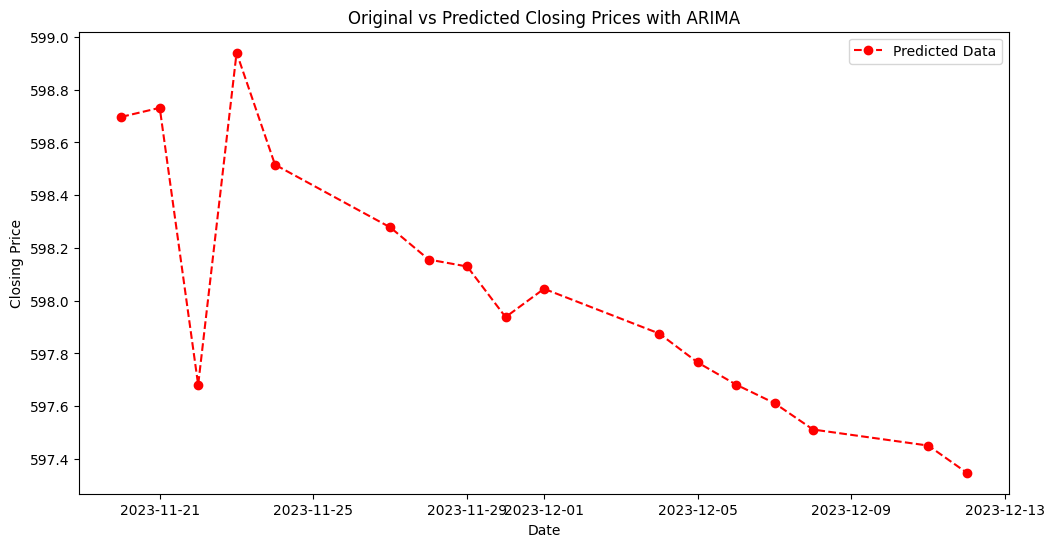

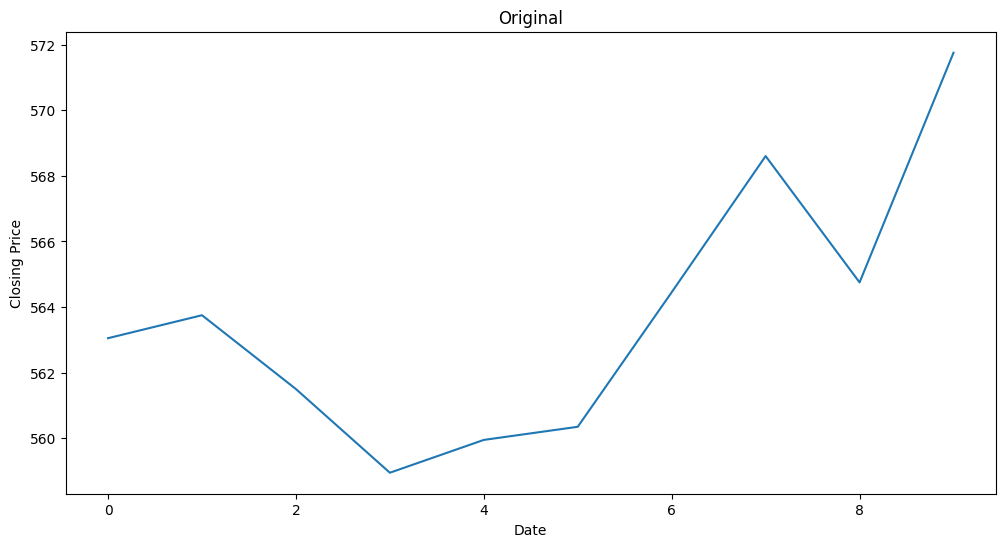

Mean Absolute Percentage Error (MAPE): 6.14%
Mean Absolute Error (MAE): 34.601279599465805
Mean Squared Error (MSE): 1212.9553743893316


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
# from datetime import datetime, timedelta

df = pd.read_csv(file_path)

# Convert 'Date' column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample the data to daily frequency (if not already in daily frequency)
df = df.resample('D').pad()

# Train-test split
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Train the ARIMA model
order = (5, 2, 0)  # Example order, you may need to tune these parameters
model = ARIMA(train_data['Close'], order=order)
arima_fit = model.fit()

# arima_pred = arima_fit.get_forecast(test_data['Close'])

# Calculate MAE and MSE
# test_values = test_data['Close'].values
# mae = mean_absolute_error(test_values, arima_pred)
# mse = mean_squared_error(test_values, arima_pred)

# Display MAE and MSE
# print(f'Mean Absolute Error (MAE): {mae}')
# print(f'Mean Squared Error (MSE): {mse}')

# Predict the next 17 working days
forecast_steps = 17
forecast = arima_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df.index[-1] + timedelta(days=1), periods=forecast_steps, freq='B')
forecast_values = forecast.predicted_mean.values

sbi_data=pd.read_csv('/content/drive/MyDrive/dsml dataset/SBIN.NS (4).csv')

# Plot the predicted values
plt.figure(figsize=(12, 6))
# plt.plot(sbi_data.index, sbi_data['Close'], label='Original Data')
plt.plot(forecast_index, forecast_values, label='Predicted Data', linestyle='--', marker='o', color='red')
plt.title('Original vs Predicted Closing Prices with ARIMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(sbi_data.index, sbi_data['Close'], label='Original Data')
# plt.plot(forecast_index, forecast_values, label='Predicted Data', linestyle='--', marker='o', color='red')
plt.title('Original')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

sbi_data=pd.read_csv('/content/drive/MyDrive/dsml dataset/SBIN.NS (4).csv')

# Calculate MAE and MSE
sbi_values = sbi_data['Close'].values
mae = mean_absolute_error(sbi_values, forecast_values[:len(sbi_values)])
mse = mean_squared_error(sbi_values, forecast_values[:len(sbi_values)])

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((sbi_values - forecast_values[:len(sbi_values)]) / sbi_values)) * 100

# Display MAPE
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Display MAE and MSE
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

In [ ]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 773.9 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
sbi = pd.read_csv('/content/drive/MyDrive/dsml dataset/SBIN.NS (1).csv')

print(sbi.head())
print(sbi.info())

         Date        Open        High         Low       Close   Adj Close  \
0  2018-11-19  293.500000  293.500000  286.049988  288.149994  275.767822   
1  2018-11-20  285.899994  288.549988  282.500000  283.450012  271.269775   
2  2018-11-21  283.450012  289.549988  283.049988  287.049988  274.715088   
3  2018-11-22  285.950012  287.049988  281.600006  282.700012  270.552032   
4  2018-11-26  284.100006  287.250000  279.600006  286.399994  274.093018   

     Volume  
0  13799970  
1  12900924  
2  16167419  
3  12066797  
4  16846820  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1236 non-null   object 
 1   Open       1236 non-null   float64
 2   High       1236 non-null   float64
 3   Low        1236 non-null   float64
 4   Close      1236 non-null   float64
 5   Adj Close  1236 non-null   float64
 6   Volume     1236 non-nu

In [ ]:
sbi['Date'] = pd.to_datetime(sbi['Date'])

print(f'Contains Stock prices between {sbi.Date.min()} {sbi.Date.max()}')

total_days = (sbi['Date'].max() - sbi['Date'].min()).days

print(f'Total days: {total_days} days')

Contains Stock prices between 2018-11-19 00:00:00 2023-11-17 00:00:00
Total days: 1824 days


In [ ]:
sbi.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03
mean,401.430785,406.090737,396.058818,400.984749,389.594417,3.124956e+07
std,135.841885,136.314995,135.165347,135.739997,136.494136,2.565303e+07
min,151.949997,153.199997,149.449997,150.850006,144.367783,0.000000e+00
25%,289.299988,292.724991,284.224998,288.124992,275.743896,1.402672e+07
50%,411.550003,415.625000,403.899994,411.250000,394.487228,2.188258e+07
75%,525.587494,531.037476,519.012497,524.762497,512.465713,4.093103e+07
max,625.549988,629.549988,617.500000,625.500000,620.200012,2.149557e+08


<Axes: >

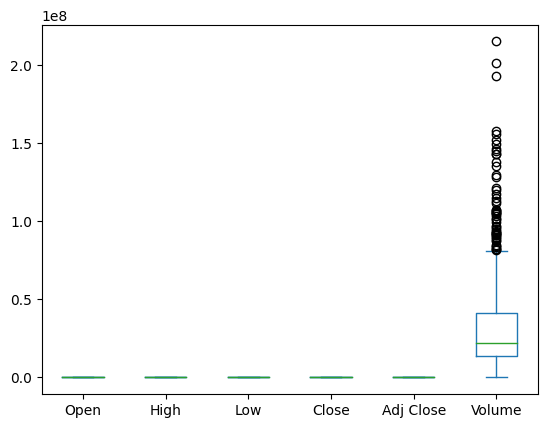

In [ ]:
sbi[['Open' , 'High' , 'Low' , 'Close' , 'Adj Close', 'Volume']].plot(kind='box')


In [ ]:

layout=go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='monospace',
            size=18,
            color="#7f7f7f"
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='monospace',
            size=18,
            color="#7f7f7f"
        )
    )
)
tesla_data=[{'x':sbi['Date'] , 'y':sbi['Close']}]
plot=go.Figure(data=tesla_data , layout=layout)
plot.show()


In [ ]:
from sklearn.model_selection import train_test_split
#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#for evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:

X=np.array(sbi.index).reshape(-1,1)
Y=sbi['Close']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)


In [ ]:
scaler=StandardScaler().fit(X_train)
lm=LinearRegression()
lm.fit(X_train,Y_train)


LinearRegression()

In [ ]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0, trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=tesla_data,layout=layout)
iplot(plot2)


In [ ]:
#calculates score for model evaluation
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'MSE'.ljust(10)}{mse{Y_train,lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
...
print(scores)


SyntaxError: ignored

In [ ]:
sbi.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:

tolerance = 2


percentage_accuracy = np.mean(np.abs((y_test - predictions) / y_test) * 100 <= tolerance)

print(f'Percentage Accuracy within {tolerance}%: {percentage_accuracy * 100:.2f}%')


Percentage Accuracy within 2%: 80.08%


In [ ]:
!pip install pmdarima

<ipython-input-42-2c5a77fd2cf0>:16: FutureWarning:

pad is deprecated and will be removed in a future version. Use ffill instead.



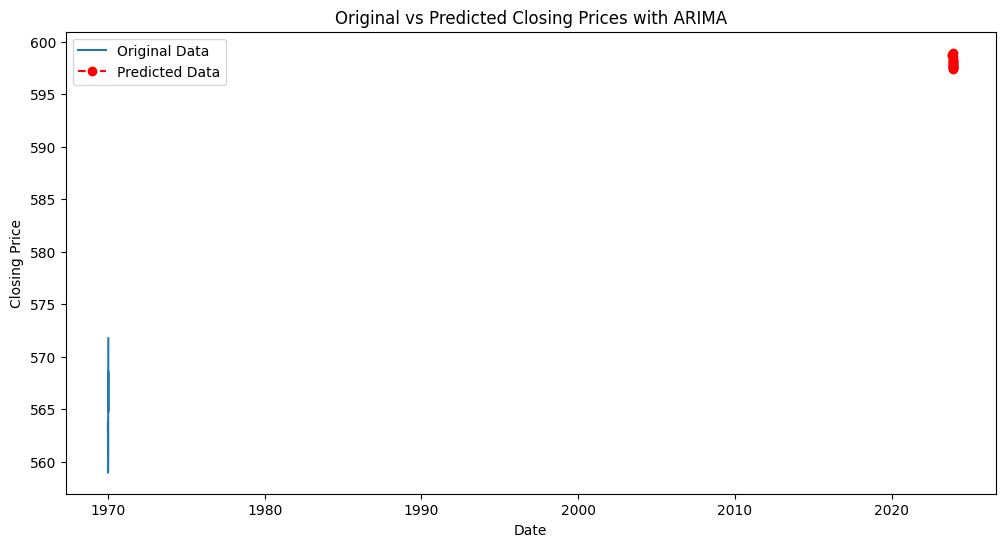

Mean Absolute Error (MAE): 34.601279599465805
Mean Squared Error (MSE): 1212.9553743893316


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import timedelta

# Assuming 'file_path' is defined before this code
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample the data to daily frequency (if not already in daily frequency)
df = df.resample('D').pad()

# Train-test split
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Train the ARIMA model
order = (5, 2, 0)  # Example order, you may need to tune these parameters
model = ARIMA(train_data['Close'], order=order)
arima_fit = model.fit()

# Predict the next 17 working days
forecast_steps = 17
forecast = arima_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df.index[-1] + timedelta(days=1), periods=forecast_steps, freq='B')
forecast_values = forecast.predicted_mean.values

# Plot the predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Original Data')
plt.plot(forecast_index, forecast_values, label='Predicted Data', linestyle='--', marker='o', color='red')
plt.title('Original vs Predicted Closing Prices with ARIMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()




In [ ]:
!pip install arch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 13.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from arch import arch_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load your stock price data
# Assuming you have a DataFrame 'df' with 'Date' and 'Close' columns
df = pd.read_csv(file_path)  # Replace 'your_stock_data.csv' with your actual data file

# Calculate daily returns
returns = df['Close'].pct_change().dropna()

# Split data into training and testing sets
train_size = int(len(returns) * 0.7)
train_data, test_data = returns[:train_size], returns[train_size:]

# Specify the GARCH(1, 1) model
model = arch_model(train_data, vol='Garch', p=1, q=1)

# Fit the model
result = model.fit()

# Forecast volatility for the test set
forecast = result.forecast(start=result.conditional_volatility.shape[0], horizon=len(test_data))
forecast_values = np.sqrt(forecast.variance.dropna().values[-1, :])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, forecast_values)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(returns.index[:train_size], result.conditional_volatility, label='Training Volatility')
plt.plot(returns.index[train_size:], forecast_values, label='Forecasted Volatility', linestyle='--', color='red')
plt.title('GARCH Volatility Forecast')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

print(f'Mean Absolute Error (MAE): {mae:.5f}')


Iteration:      1,   Func. Count:      6,   Neg. LLF: 19842986.301698476
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4746321215.451621
Iteration:      3,   Func. Count:     32,   Neg. LLF: 2197869753.7614713
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2065.404859015886
            Iterations: 3
            Function evaluations: 42
            Gradient evaluations: 3


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005759. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




IndexError: ignored

In [ ]:
import pandas as pd
import numpy as np
from arch import arch_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load your stock price data
# Assuming you have a DataFrame 'df' with 'Date' and 'Close' columns
file_path = "/content/drive/MyDrive/dsml dataset/SBIN.NS (1).csv"
df = pd.read_csv(file_path)

# Calculate daily returns
returns = df['Close'].pct_change().dropna()

# Split data into training and testing sets
train_size = int(len(returns) * 0.8)
train_data, test_data = returns[:train_size], returns[train_size:]

# Specify the GARCH(1, 1) model
model = arch_model(train_data, vol='Garch', p=1, q=1)

# Fit the model
result = model.fit()

# Forecast volatility for the test set
forecast = result.forecast(start=result.conditional_volatility.shape[0], horizon=len(test_data))
print(forecast)
forecast_values = np.sqrt(forecast.variance.dropna().values[-1])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, forecast_values)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(returns.index[:train_size], result.conditional_volatility, label='Training Volatility')
plt.plot(returns.index[train_size:], forecast_values, label='Forecasted Volatility', linestyle='--', color='red')
plt.title('GARCH Volatility Forecast')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

print(f'Mean Absolute Error (MAE): {mae:.5f}')


Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.0703955207723255e+18
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2986394.3292571944
Iteration:      3,   Func. Count:     30,   Neg. LLF: 2354257635309539.0
Iteration:      4,   Func. Count:     41,   Neg. LLF: -2409.3339397773234
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2409.3339358875924
            Iterations: 8
            Function evaluations: 41
            Gradient evaluations: 4


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005299. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


IndexError: ignored

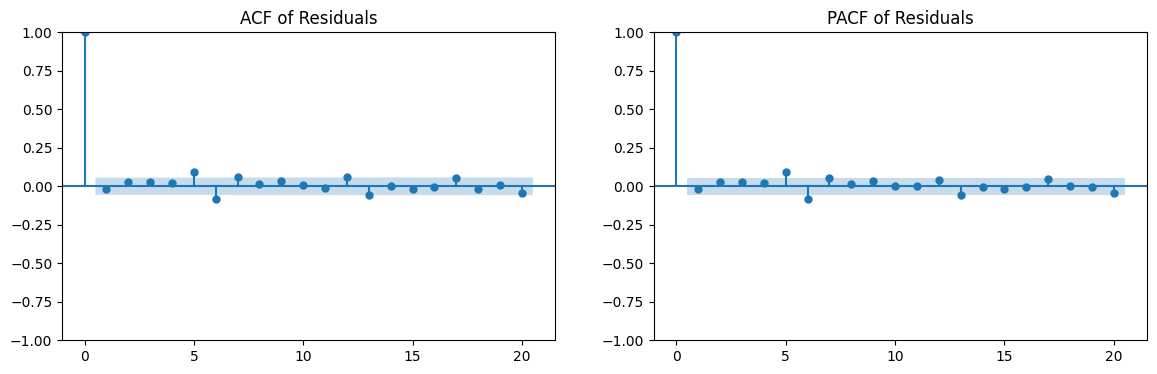

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.0703955207723255e+18
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2986394.3292571944
Iteration:      3,   Func. Count:     30,   Neg. LLF: 2354257635309539.0
Iteration:      4,   Func. Count:     41,   Neg. LLF: -2409.3339397773234
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2409.3339358875924
            Iterations: 8
            Function evaluations: 41
            Gradient evaluations: 4


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005299. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




IndexError: ignored

In [ ]:
import pandas as pd
import numpy as np
from arch import arch_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Load your stock price data
# Assuming you have a DataFrame 'df' with 'Date' and 'Close' columns
file_path = "/content/drive/MyDrive/dsml dataset/SBIN.NS (1).csv"
df = pd.read_csv(file_path)

# Calculate daily returns
returns = df['Close'].pct_change().dropna()


# Plot ACF and PACF of residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# ACF plot
plot_acf(returns, lags=20, ax=ax1)
ax1.set_title('ACF of Residuals')

# PACF plot
plot_pacf(returns, lags=20, ax=ax2)
ax2.set_title('PACF of Residuals')

plt.show()


# Split data into training and testing sets
train_size = int(len(returns) * 0.8)
train_data, test_data = returns[:train_size], returns[train_size:]

# Specify the GARCH(1, 1) model
model = arch_model(train_data, vol='Garch', p=1, q=1)

# Fit the model
result = model.fit()

# Forecast volatility for the test set
forecast = result.forecast(start=result.conditional_volatility.shape[0], horizon=len(test_data))
print(forecast)
forecast_values = np.sqrt(forecast.variance.dropna().values[-1])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, forecast_values)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(returns.index[:train_size], result.conditional_volatility, label='Training Volatility')
plt.plot(returns.index[train_size:], forecast_values, label='Forecasted Volatility', linestyle='--', color='red')
plt.title('GARCH Volatility Forecast')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

print(f'Mean Absolute Error (MAE): {mae:.5f}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



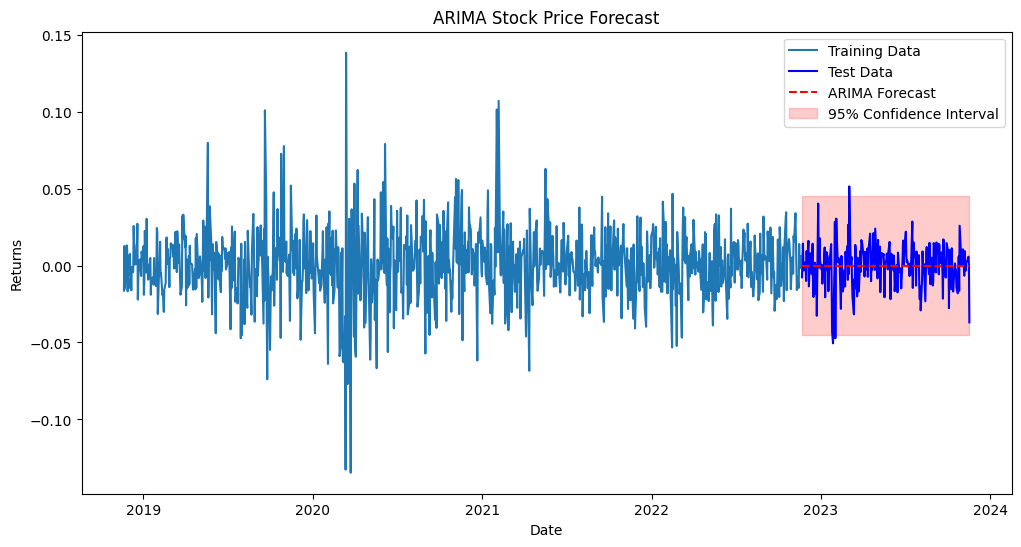

AttributeError: ignored

In [ ]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load your stock price data
# Assuming you have a DataFrame 'df' with 'Date' and 'Close' columns
df = pd.read_csv(file_path)  # Replace 'your_stock_data.csv' with your actual data file

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate daily returns
returns = df['Close'].pct_change().dropna()

# Split data into training and testing sets
train_size = int(len(returns) * 0.8)
train_data, test_data = returns[:train_size], returns[train_size:]

# Fit ARIMA model using auto_arima
arima_model = auto_arima(train_data, seasonal=False, suppress_warnings=True)
model = arima_model.fit(train_data)

# Forecast next 'n' periods
n_periods = len(test_data)
arima_forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, arima_forecast)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data', color='blue')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', linestyle='--', color='red')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.2, label='95% Confidence Interval')
plt.title('ARIMA Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

forecast_steps = 17
forecast = model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df.index[-1] + timedelta(days=1), periods=forecast_steps, freq='B')
forecast_values = forecast.predicted_mean.values

sbi_data=pd.read_csv('/content/drive/MyDrive/dsml dataset/SBIN.NS (4).csv')

# Plot the predicted values
plt.figure(figsize=(12, 6))
# plt.plot(sbi_data.index, sbi_data['Close'], label='Original Data')
plt.plot(forecast_index, forecast_values, label='Predicted Data', linestyle='--', marker='o', color='red')
plt.title('Original vs Predicted Closing Prices with ARIMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

print(f'Mean Absolute Error (MAE): {mae:.5f}')


In [ ]:
# Import packages
import numpy as np
import pandas as pd
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load data
df = pd.read_csv(file_path)
y = df["Close"].values

# Split data into train and test sets
train_size = int(len(y) * 0.8) # Use 80% of the data as train set
train, test = y[:train_size], y[train_size:]

# Fit ARIMA model on train set
model = pm.auto_arima(train, seasonal=True, m=12) # Use seasonal ARIMA with monthly frequency
print(model.summary()) # Print model summary

# Forecast on test set
forecasts = model.predict(test.shape[0]) # Predict the same number of steps as the test set
print(forecasts) # Print forecasts

# Evaluate forecasts
mae = mean_absolute_error(test, forecasts) # Calculate MAE
rmse = np.sqrt(mean_squared_error(test, forecasts)) # Calculate RMSE
print(f"MAE: {mae:.2f}") # Print MAE
print(f"RMSE: {rmse:.2f}") # Print RMSE


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  988
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3386.905
Date:                Wed, 06 Dec 2023   AIC                           6775.810
Time:                        03:27:34   BIC                           6780.705
Sample:                             0   HQIC                          6777.671
                                - 988                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        55.9905      1.749     32.012      0.000      52.562      59.419
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               191.77
Prob(Q):                              0.77   Pr